## The Most Environmentally Friendly Neighborhood

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
cans = pd.read_csv('PittsburghSmartTrash.csv')
neighborhood = pd.read_csv('neighborhoods.csv')
fire = pd.read_csv('FireIncidents.csv')

In [91]:
sortedarea = neighborhood.sort_values(by = "hood")
sortedareadf = sortedarea[['hood','acres']]
newsortedareadf = sortedareadf.reset_index(drop=True)
newsortedareadf

,hood,acres
0,Allegheny Center,134.703
1,Allegheny West,90.841
2,Allentown,189.608
3,Arlington,302.320
4,Arlington Heights,84.592
...,...,...
85,Upper Lawrenceville,260.349
86,West End,128.679
87,West Oakland,138.372
88,Westwood,445.009


In [97]:
# this creates a new table to show the ratio of fires to acres of neighborhood
new_df = fire.sort_values(["neighborhood"], ascending=True)
fire['neighborhood'].value_counts()

newdf =fire['neighborhood'].value_counts().rename_axis('neighborhood').reset_index(name='frequency')
sorteddf = newdf.sort_values(["neighborhood"], ascending=True)
sortednew = sorteddf.reset_index(drop=True)
mergesorteddata = sortednew.merge(newsortedareadf, left_on = 'neighborhood', right_on = 'hood', suffixes=('frequency', 'acres'))
mergesorteddata.sort_values(['frequency'], ascending=True)
mergesorteddata['ratio'] = mergesorteddata['acres']/mergesorteddata['frequency'] 
ratio = mergesorteddata.sort_values(["ratio"], ascending=False)
r = ratio.drop(columns='hood')
r.head(20)

,neighborhood,frequency,acres,ratio
37,Hays,18,1125.478,62.526556
26,East Carnegie,10,277.895,27.789500
31,Fairywood,23,622.746,27.075913
54,New Homestead,20,510.728,25.536400
81,Swisshelm Park,15,308.575,20.571667
66,Ridgemont,12,237.059,19.754917
88,Westwood,23,445.009,19.348217
77,St. Clair,11,199.285,18.116818
65,Regent Square,7,123.682,17.668857
89,Windgap,17,266.678,15.686941


In [93]:
#created a new table merging the two together and calculating the ratio
# this table refers to the smart trash cans and the ratio of that to acreage of neighborhood
new_df= cans.sort_values(["neighborhood"], ascending=False)

sort = neighborhood.sort_values(by = "hood")
sorted = sort[['hood','acres']]
new = sorted.reset_index(drop=True)

n =cans['neighborhood'].value_counts().rename_axis('neighborhood').reset_index(name='frequency')
df = n.sort_values(["neighborhood"], ascending=True)
s = df.reset_index(drop=True)
merge = s.merge(new, left_on = 'neighborhood', right_on = 'hood', suffixes=('frequency', 'acres'))
merge['ratio'] = merge['frequency']/merge['acres']
finalresult = merge.sort_values(["ratio"], ascending=False)
finalresult= finalresult.drop(columns='hood')
true = finalresult.drop(labels=51) ## to take out Perry North since it is 0 acres, causing an infinite number
true

,neighborhood,frequency,acres,ratio
48,North Shore,52,195.014,0.266648
17,Central Oakland,39,180.883,0.215609
25,East Liberty,68,373.650,0.181988
28,Friendship,12,68.297,0.175703
22,East Allegheny,26,151.705,0.171385
...,...,...,...,...
68,Stanton Heights,2,472.615,0.004232
78,Windgap,1,266.678,0.003750
23,East Carnegie,1,277.895,0.003598
70,Swisshelm Park,1,308.575,0.003241


In [65]:
# import pandas as pd
df = pd.read_csv('Pittsburgh_Beautify_The_Burgh.csv')
dataSetTwo = df[['Neighborhood','SHAPE_Area']]
#dataSetTwo = df.groupby('Neighborhood').mean().sort_values(['SHAPE_Area','Neighborhood'],ascending =[False,True])
#dataSetTwo['SHAPE_Area'] = dataSetTwo['SHAPE_Area']/4046.86
sortDataSetTwo = dataSetTwo.sort_values(by="Neighborhood")
df2 = sortDataSetTwo.groupby(['Neighborhood']).sum()
#mergedf2 = sortDataSetTwo.groupby(by=sortDataSetTwo.columns, axis=1).sum
#mergedf2 = sortDataSetTwo.groupby(['Neighborhood']).agg({'SHAPE_Area' : 'sum'})
#mergedf2
df2['SHAPE_Area'] = df2['SHAPE_Area']/4046.8564224
#df2
df2['Neighborhood'] = df2.index
df2.reset_index(drop=True)
columns_titles = ["Neighborhood","SHAPE_Area"]
df2=df2.reindex(columns=columns_titles)
df2=df2['SHAPE_Area'].rename_axis('Neighborhood').reset_index(name='area')
df2
##newdf =fire_incident['neighborhood'].value_counts().rename_axis('neighborhood').reset_index(name='frequency')

,Neighborhood,area
0,Allegheny West,4.732557
1,Allentown,3.749644
2,Arlington,5.947094
3,Beltzhoover,23.596112
4,Bluff/Uptown,2.270216
5,Carrick,3.781603
6,Central Business District,9.649654
7,Central Oakland,50.399079
8,East Liberty,7.738735
9,Elliott,8.368664


In [66]:
df1 = neighborhood.sort_values(by = "hood")
dfaa = df1[['hood','acres']]
df3 = dfaa.reset_index(drop=True)

newdf =df['Neighborhood'].value_counts().rename_axis('Neighborhood').reset_index(name='area')
sorteddf = newdf.sort_values(["Neighborhood"], ascending=True)
sortednew = sorteddf.reset_index(drop=True)
mergesorteddata = sortednew.merge(df3, how = 'left', left_on = 'Neighborhood', right_on = 'hood', suffixes=('area', 'acres'))
mergesorteddata.sort_values(['area'], ascending=True)
mergesorteddata['ratio'] = mergesorteddata['area'] / mergesorteddata['acres']
ratio = mergesorteddata.sort_values(["ratio"], ascending=True)
addcol = df2['area']
ratio.insert(1, 'shapearea', addcol)
ratio['realratio'] = ratio['shapearea'] / ratio['acres']
del ratio["area"]
del ratio["hood"]
del ratio["ratio"]
ratio
ratio = ratio.sort_values(["realratio"], ascending=True)
ratio = ratio.dropna()
ratio

,Neighborhood,shapearea,acres,realratio
11,Hazelwood,2.810837,1017.805,0.002762
5,Carrick,3.781603,1075.670,0.003516
19,Sheraden,3.959767,572.125,0.006921
10,Greenfield,3.894347,497.028,0.007835
18,Shadyside,6.987445,592.104,0.011801
17,Point Breeze,10.301870,645.695,0.015955
12,Homewood South,4.766865,256.093,0.018614
2,Arlington,5.947094,302.320,0.019672
1,Allentown,3.749644,189.608,0.019776
8,East Liberty,7.738735,373.650,0.020711


In [115]:
# combining both the ratio from the fire incidents and the ratio from the smart trash cans
new_df= true.sort_values(["neighborhood"], ascending=False)

sort = r.sort_values(by = "neighborhood")
sorted = sort[['neighborhood','ratio']]
new = sorted.reset_index(drop=True)

n =true['neighborhood'].value_counts().rename_axis('neighborhood').reset_index(name='total')
df = n.sort_values(["neighborhood"], ascending=True)
s = df.reset_index(drop=True)
merge = s.merge(new, left_on = 'neighborhood', right_on = 'neighborhood', suffixes=('total', 'ratio'))
merge['ratio'] = merge['total'] + merge['ratio']
f = merge.sort_values(["ratio"], ascending=False)
f.join

,neighborhood,total,ratio
23,East Carnegie,1,28.789500
69,Swisshelm Park,1,21.571667
76,Westwood,1,20.348217
66,St. Clair,1,19.116818
55,Regent Square,1,18.668857
77,Windgap,1,16.686941
50,Oakwood,1,13.462692
21,Duquesne Heights,1,13.135394
38,Lincoln Place,1,12.712907
4,Banksville,1,12.535537


In [20]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
map = neighborhoods.merge(f, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
map[['hood','ratio']].head()

,hood,ratio
0,Central Oakland,3.179313
1,North Oakland,3.837867
2,West Oakland,3.515855
3,Crawford-Roberts,2.866303
4,Strip District,9.316255


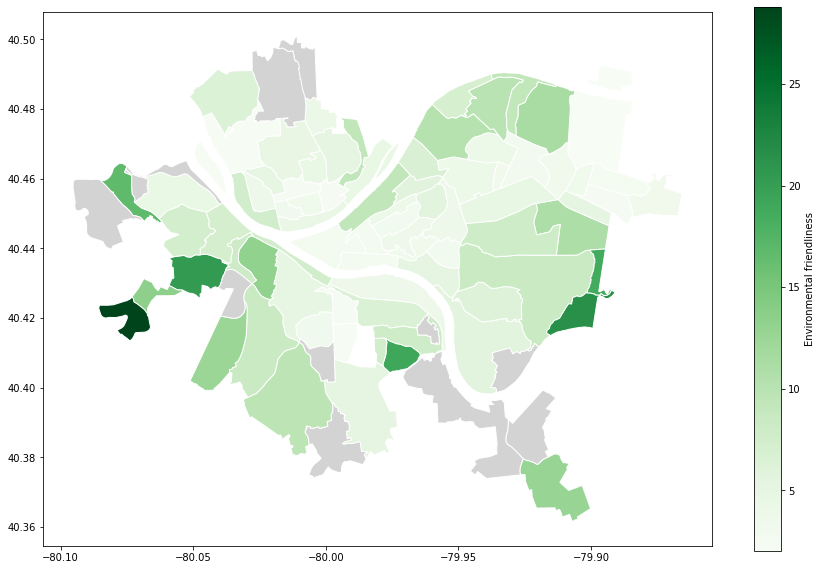

In [33]:
map.plot(column='ratio', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Environmental friendliness"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

Conclusion Paragraphs:
Ruchi: 

Dailynn:

Le Lin: 